# Lead Score Case Study
## Problem Statement: 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company requires to build a model wherein to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

### Goals of the Case Study

- To Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

- A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Reading and Understanding the Data

Let us first import python libraries and read the Leads dataset

### Import Python libraries

In [1]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import libraries for model building and evaluation

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Read the data from csv
leads= pd.read_csv('Leads.csv')

In [4]:
#use set_option from pandas to see all the columns
pd.set_option('display.max_columns', 1000)

In [5]:
# Let's see the head of our master dataset
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [6]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

- Drop the duplicate records

In [7]:
# let's drop the duplicate records
leads.drop_duplicates(inplace=True)

In [8]:
# Let's check the dimensions of the dataframe after dropping duplicates
leads.shape

(9240, 37)

In [9]:
#let's drop the Prospect ID & Lead Number Columns as they are not needed for analysis
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
leads.shape

(9240, 35)

In [10]:
# let's print the column names
print(leads.columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [11]:
# Rename the columns with longer names succinctly
leads.rename(columns= {'Do Not Email':'No Email',
                       'Do Not Call':'No Call',
                       'Total Time Spent on Website':'Surfing Time',
                       'Page Views Per Visit':'Page Views',
                       'How did you hear about X Education':'Info Source', 
                       'What is your current occupation':'Occupation',
                       'I agree to pay the amount through cheque': 'Cheque Payment',
                      'What matters most to you in choosing a course':'Course Reason',
                      'Receive More Updates About Our Courses': 'Receive Updates',
                      'Update me on Supply Chain Content':'Supply Chain Update ',
                      'Get updates on DM Content':'DM Update',
                      'A free copy of Mastering The Interview':'Interview Copy',
                      'Asymmetrique Activity Index': 'AA Index',
                      'Asymmetrique Profile Index': 'AP Index',
                      'Asymmetrique Activity Score':'AA Score',
                      'Asymmetrique Profile Score':'AP Score'}, inplace=True)
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Country,Specialization,Info Source,Occupation,Course Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive Updates,Tags,Lead Quality,Supply Chain Update,DM Update,Lead Profile,City,AA Index,AP Index,AA Score,AP Score,Cheque Payment,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


- Replace the columns that contain Select with null as it indicates user hasn't selected any option from the UI Screen on Website

In [12]:
# Replace the 'Select' value with null
leads= leads.replace('Select', np.NaN)

leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Country,Specialization,Info Source,Occupation,Course Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive Updates,Tags,Lead Quality,Supply Chain Update,DM Update,Lead Profile,City,AA Index,AP Index,AA Score,AP Score,Cheque Payment,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


- Data Imbalance check

In [13]:
#check the value counts percentage on the Target column
leads.Converted.value_counts(normalize=True) * 100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [14]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Converted,TotalVisits,Surfing Time,Page Views,AA Score,AP Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
# Let's see the datatype of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead Origin              9240 non-null   object 
 1   Lead Source              9204 non-null   object 
 2   No Email                 9240 non-null   object 
 3   No Call                  9240 non-null   object 
 4   Converted                9240 non-null   int64  
 5   TotalVisits              9103 non-null   float64
 6   Surfing Time             9240 non-null   int64  
 7   Page Views               9103 non-null   float64
 8   Last Activity            9137 non-null   object 
 9   Country                  6779 non-null   object 
 10  Specialization           5860 non-null   object 
 11  Info Source              1990 non-null   object 
 12  Occupation               6550 non-null   object 
 13  Course Reason            6531 non-null   object 
 14  Search                  

In [16]:
# let's see the % of null values in each column
round((leads.isnull().sum()/leads.shape[0])* 100, 2)

Lead Origin                 0.00
Lead Source                 0.39
No Email                    0.00
No Call                     0.00
Converted                   0.00
TotalVisits                 1.48
Surfing Time                0.00
Page Views                  1.48
Last Activity               1.11
Country                    26.63
Specialization             36.58
Info Source                78.46
Occupation                 29.11
Course Reason              29.32
Search                      0.00
Magazine                    0.00
Newspaper Article           0.00
X Education Forums          0.00
Newspaper                   0.00
Digital Advertisement       0.00
Through Recommendations     0.00
Receive Updates             0.00
Tags                       36.29
Lead Quality               51.59
Supply Chain Update         0.00
DM Update                   0.00
Lead Profile               74.19
City                       39.71
AA Index                   45.65
AP Index                   45.65
AA Score  

## Step 2: Data Cleaning

In [17]:
# let's print the head of the leads dataframe again
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Country,Specialization,Info Source,Occupation,Course Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive Updates,Tags,Lead Quality,Supply Chain Update,DM Update,Lead Profile,City,AA Index,AP Index,AA Score,AP Score,Cheque Payment,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


- Drop columns with null values >=50%

In [18]:
# drop the columns with null values >=50%
def filter_columns(df):
    for i in df.columns:
        if (((df[i].isnull().sum())/df.shape[0])*100>45):
            df.drop(i, axis=1, inplace= True)
    return df

leads= filter_columns(leads)
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Country,Specialization,Occupation,Course Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive Updates,Tags,Supply Chain Update,DM Update,City,Cheque Payment,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


In [19]:
leads.shape

(9240, 28)

- Drop the values with value_counts=1 i.e constant value columns

In [20]:
#let's drop the columns with value_counts=1 because they are just a constant value columns ans not needed for analysis
def remove_constant_columns(df):
    for i in df.columns:
        if df[i].value_counts().size==1:
            df.drop(i, axis=1, inplace= True)
    return df

leads= remove_constant_columns(leads)
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Country,Specialization,Occupation,Course Reason,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened


In [21]:
leads.shape

(9240, 23)

### Treating Missing values and Outliers

In [22]:
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Country,Specialization,Occupation,Course Reason,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened


In [23]:
# let's see the new % of null values in each column
round((leads.isnull().sum()/leads.shape[0])* 100, 2)

Lead Origin                 0.00
Lead Source                 0.39
No Email                    0.00
No Call                     0.00
Converted                   0.00
TotalVisits                 1.48
Surfing Time                0.00
Page Views                  1.48
Last Activity               1.11
Country                    26.63
Specialization             36.58
Occupation                 29.11
Course Reason              29.32
Search                      0.00
Newspaper Article           0.00
X Education Forums          0.00
Newspaper                   0.00
Digital Advertisement       0.00
Through Recommendations     0.00
Tags                       36.29
City                       39.71
Interview Copy              0.00
Last Notable Activity       0.00
dtype: float64

In [24]:
#let's look at the columns with null values 
leads.Country.value_counts(normalize=True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [25]:
# Since Country has more than 95% of non-null values as India and 26% overall null values we can drop this column 
leads.drop('Country', axis=1, inplace=True)
leads.shape

(9240, 22)

In [26]:
leads.Specialization.value_counts(normalize=True) * 100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [27]:
leads.Occupation.value_counts(normalize=True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: Occupation, dtype: float64

In [28]:
leads['Course Reason'].value_counts(normalize=True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: Course Reason, dtype: float64

In [29]:
# We can drop the column 'Course Reason'
leads.drop('Course Reason', axis=1, inplace=True)
leads.shape

(9240, 21)

In [30]:
leads.Tags.value_counts(normalize=True) * 100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [31]:
# Tags column contains 36 % null values overall and 35% Will revert after reading the email of non-null values
# mostly added as an explanation so we can drop this
leads.drop('Tags', axis=1, inplace=True)
leads.shape

(9240, 20)

In [32]:
leads.City.value_counts(normalize=True) * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [33]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'No Email', 'No Call', 'Converted',
       'TotalVisits', 'Surfing Time', 'Page Views', 'Last Activity',
       'Specialization', 'Occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'City', 'Interview Copy',
       'Last Notable Activity'],
      dtype='object')

In [34]:
# let's look at the bull values % after dropping few columns
round((leads.isnull().sum()/leads.shape[0])* 100, 2)

Lead Origin                 0.00
Lead Source                 0.39
No Email                    0.00
No Call                     0.00
Converted                   0.00
TotalVisits                 1.48
Surfing Time                0.00
Page Views                  1.48
Last Activity               1.11
Specialization             36.58
Occupation                 29.11
Search                      0.00
Newspaper Article           0.00
X Education Forums          0.00
Newspaper                   0.00
Digital Advertisement       0.00
Through Recommendations     0.00
City                       39.71
Interview Copy              0.00
Last Notable Activity       0.00
dtype: float64

- Imputation of missing values

In [35]:
# let's impute the null values of the categorical variables for missing values >15% with mode
# categorical_columns list 
categorical_columns= ['Lead Source', 'Specialization', 'Occupation', 'City']
leads[categorical_columns]= leads[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Specialization,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened


In [36]:
# let's see the new % of null values in each column
round((leads.isnull().sum()/leads.shape[0])* 100, 2)

Lead Origin                0.00
Lead Source                0.00
No Email                   0.00
No Call                    0.00
Converted                  0.00
TotalVisits                1.48
Surfing Time               0.00
Page Views                 1.48
Last Activity              1.11
Specialization             0.00
Occupation                 0.00
Search                     0.00
Newspaper Article          0.00
X Education Forums         0.00
Newspaper                  0.00
Digital Advertisement      0.00
Through Recommendations    0.00
City                       0.00
Interview Copy             0.00
Last Notable Activity      0.00
dtype: float64

In [37]:
leads.shape

(9240, 20)

In [38]:
# let's drop the records with null values< 2%
leads.dropna(inplace=True)
leads.shape

(9103, 20)

In [39]:
# let's see the new % of null values in each column
round((leads.isnull().sum()/leads.shape[0])* 100, 2)

Lead Origin                0.0
Lead Source                0.0
No Email                   0.0
No Call                    0.0
Converted                  0.0
TotalVisits                0.0
Surfing Time               0.0
Page Views                 0.0
Last Activity              0.0
Specialization             0.0
Occupation                 0.0
Search                     0.0
Newspaper Article          0.0
X Education Forums         0.0
Newspaper                  0.0
Digital Advertisement      0.0
Through Recommendations    0.0
City                       0.0
Interview Copy             0.0
Last Notable Activity      0.0
dtype: float64

In [40]:
leads.describe()

,Converted,TotalVisits,Surfing Time,Page Views
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


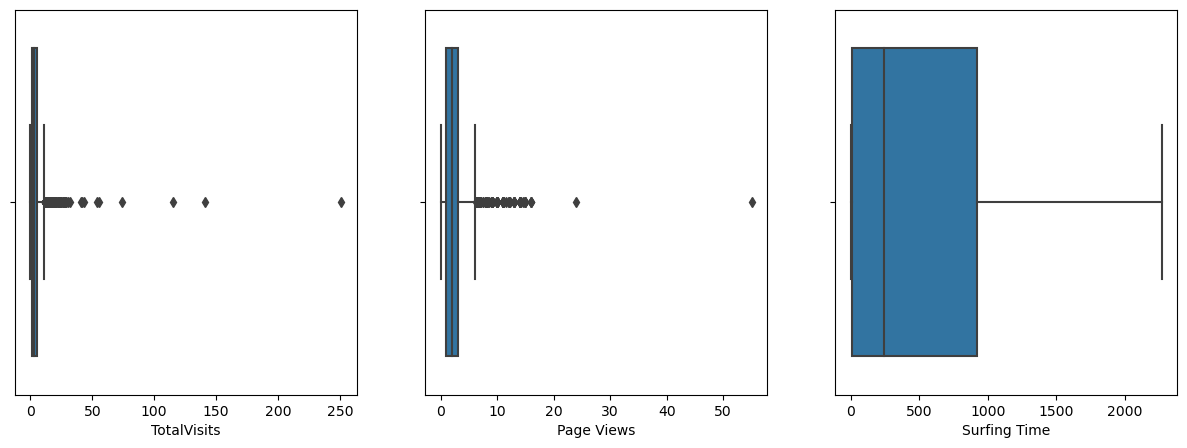

In [41]:
#Let's plot the box plot for numerical columns to check for outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(leads.TotalVisits)
plt.subplot(1,3,2)
sns.boxplot(leads['Page Views'])
plt.subplot(1,3,3)
sns.boxplot(leads['Surfing Time'])
plt.show()

Impute the values above 95% to avoid the outliers

In [42]:
# let's cap the values above 95% to avoid the outliers
leads.TotalVisits[leads.TotalVisits> leads.TotalVisits.quantile(0.95)]= leads.TotalVisits.quantile(0.95)
leads['Page Views'][leads['Page Views']> leads['Page Views'].quantile(0.95)]= leads['Page Views'].quantile(0.95)

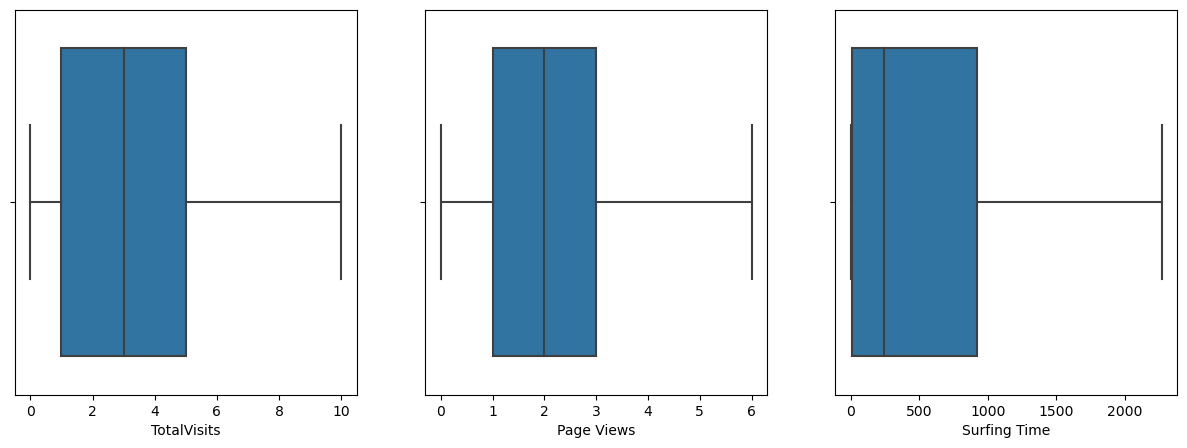

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(leads.TotalVisits)
plt.subplot(1,3,2)
sns.boxplot(leads['Page Views'])
plt.subplot(1,3,3)
sns.boxplot(leads['Surfing Time'])
plt.show()

In [44]:
leads.shape

(9103, 20)

In [45]:
leads.head(3)

,Lead Origin,Lead Source,No Email,No Call,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Specialization,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened


- Now that we have cleaned the data let's go ahead with visualization of data

## Step 3: Data Visualization & Analysis

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Univariate Analysis and Bivariate Analysis

#### Numeric-Numeric analysis

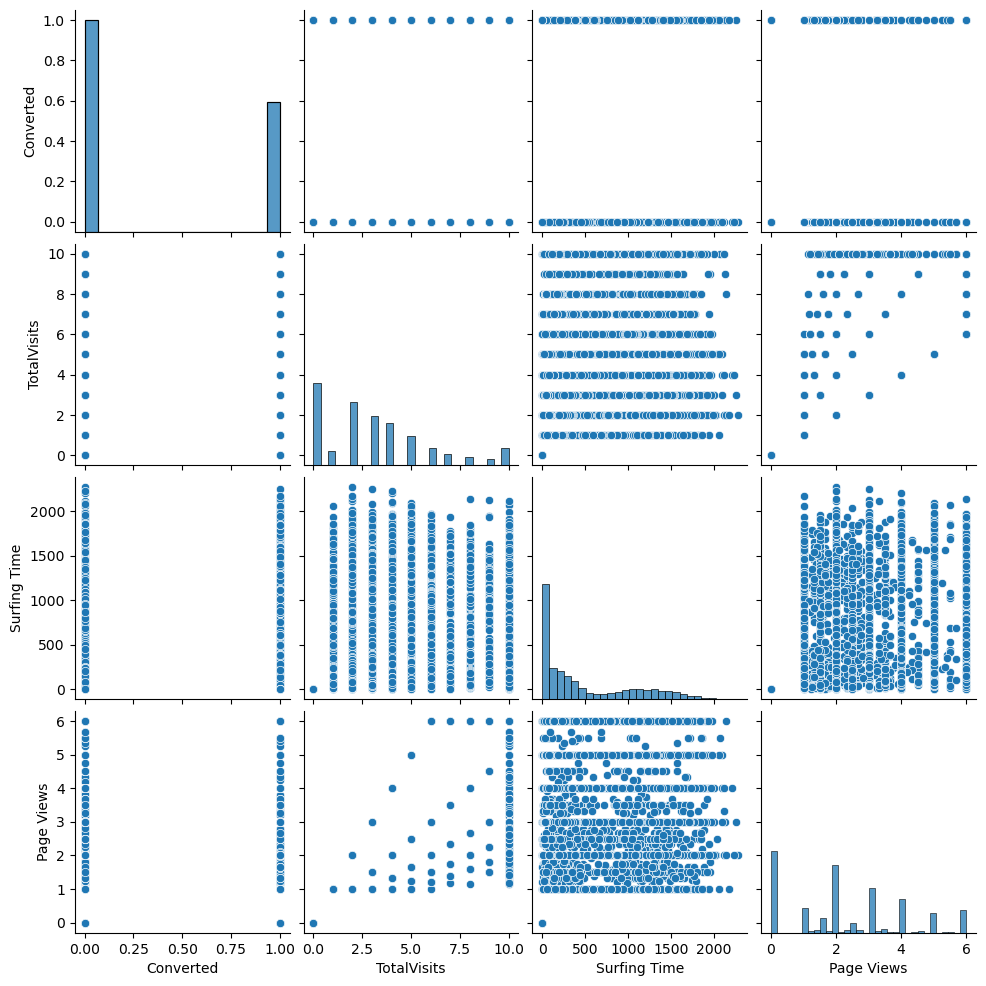

In [46]:
# let's plot the pairplot for numeric s numeric variables
sns.pairplot(leads)
plt.show()

#### Numeric- Categorical variables

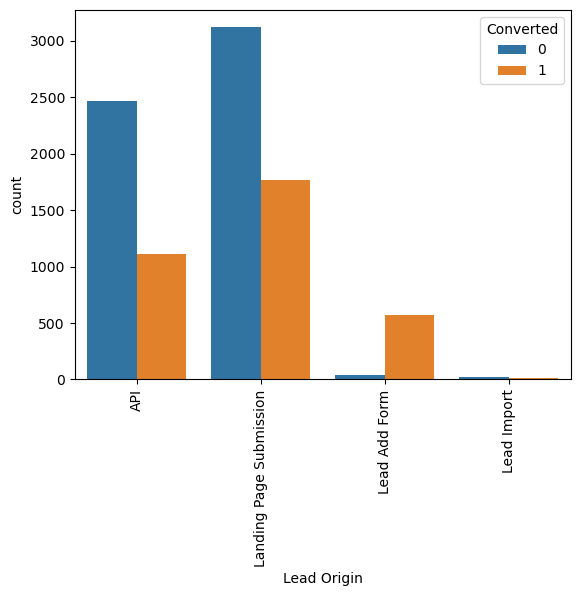

Lead Origin
object


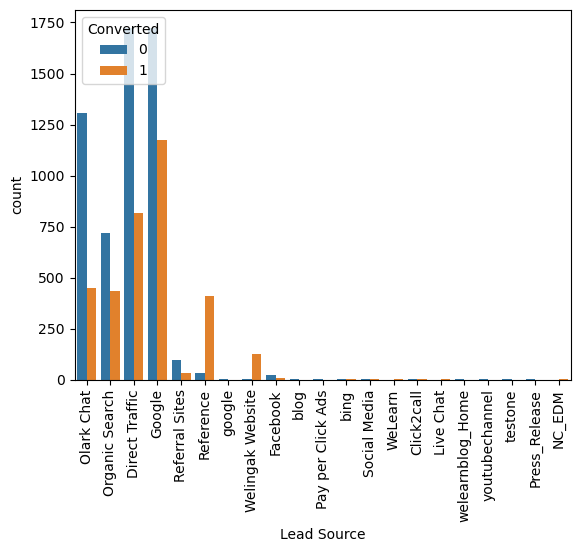

Lead Source
object


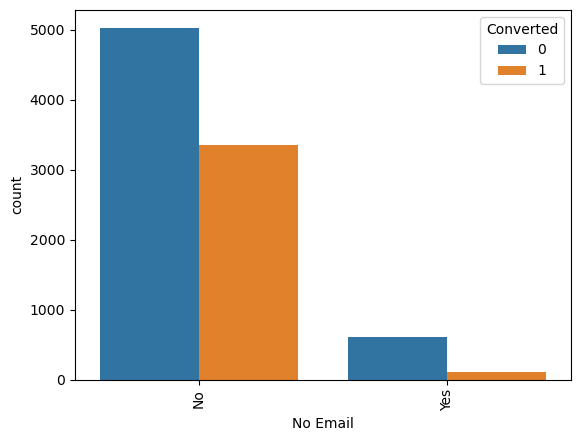

No Email
object


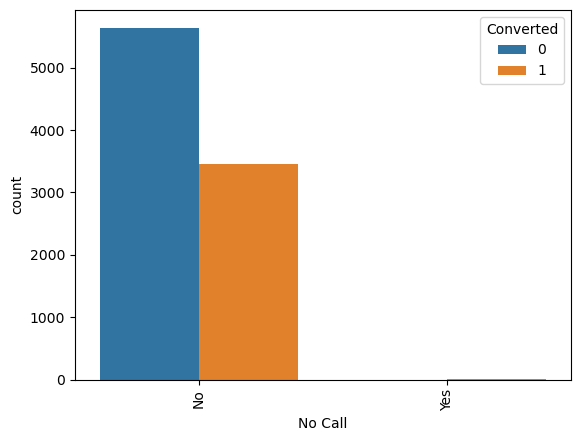

No Call
object


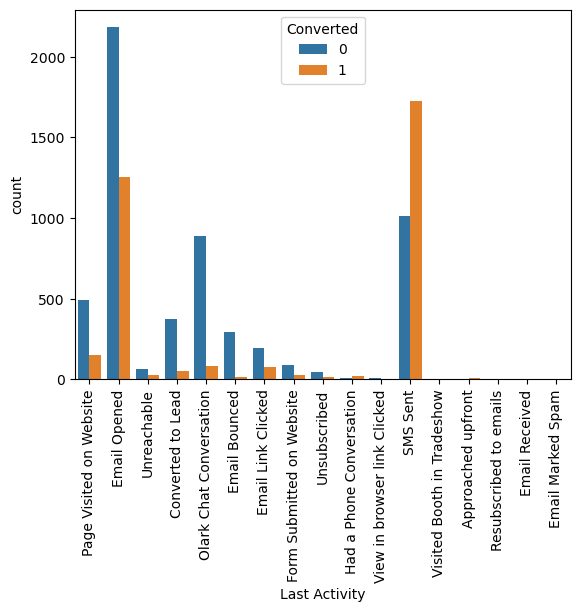

Last Activity
object


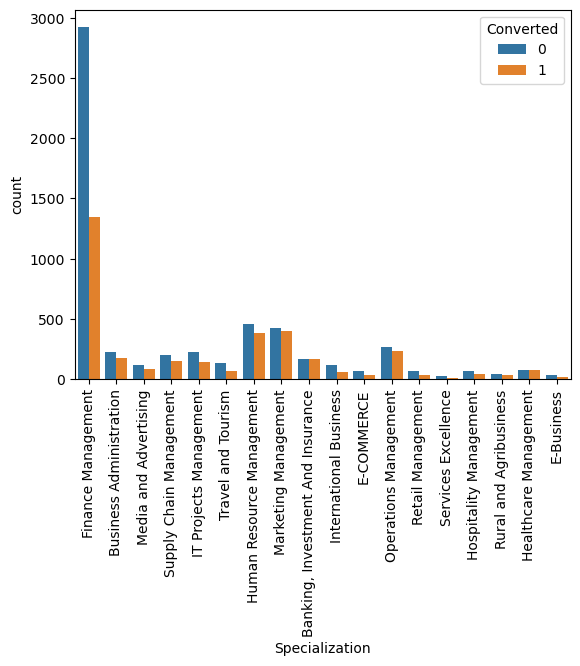

Specialization
object


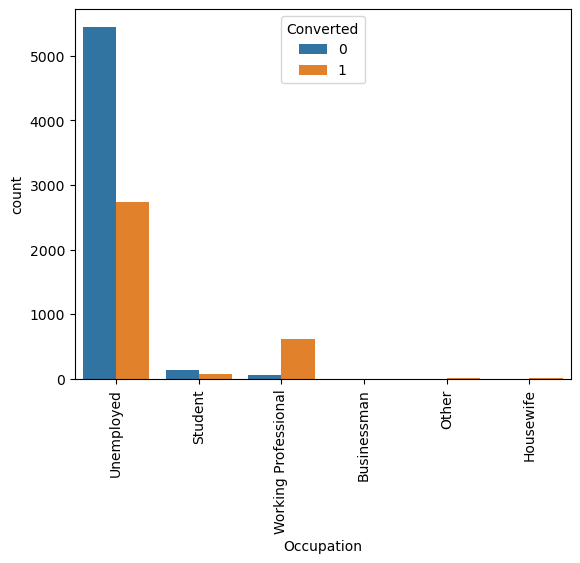

Occupation
object


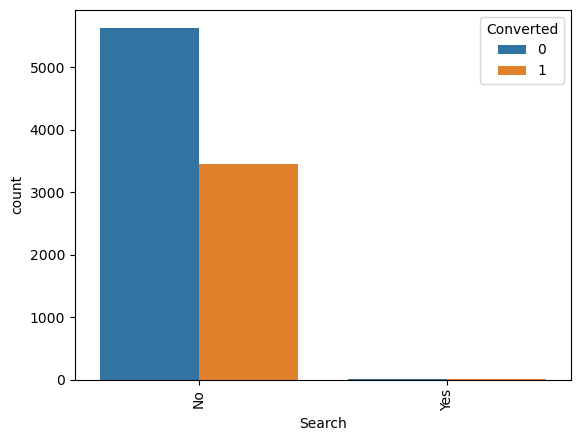

Search
object


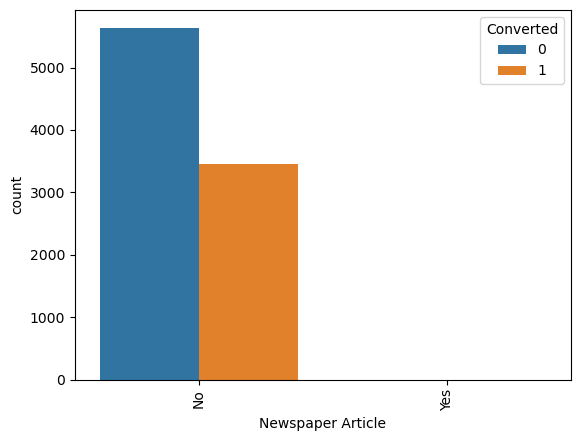

Newspaper Article
object


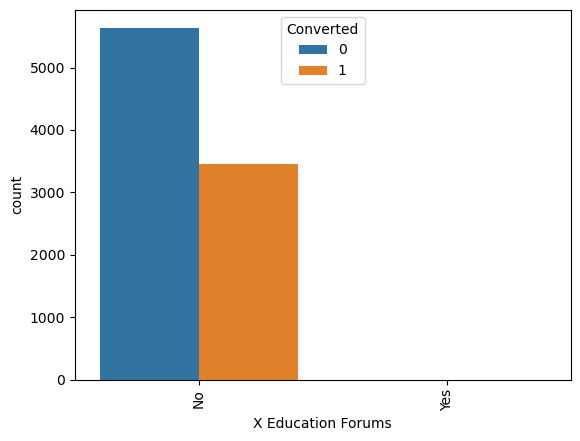

X Education Forums
object


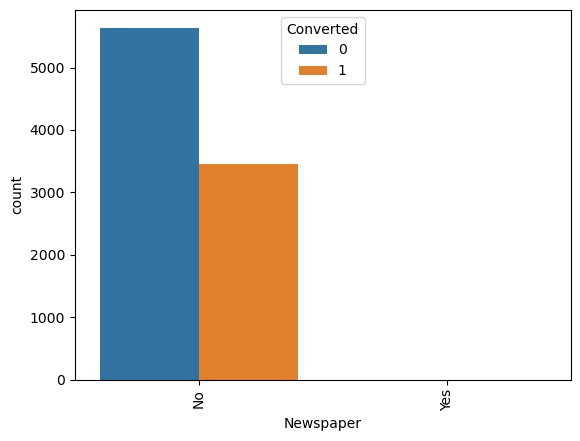

Newspaper
object


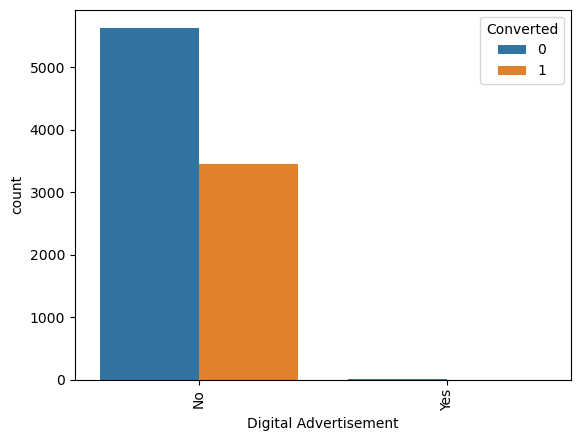

Digital Advertisement
object


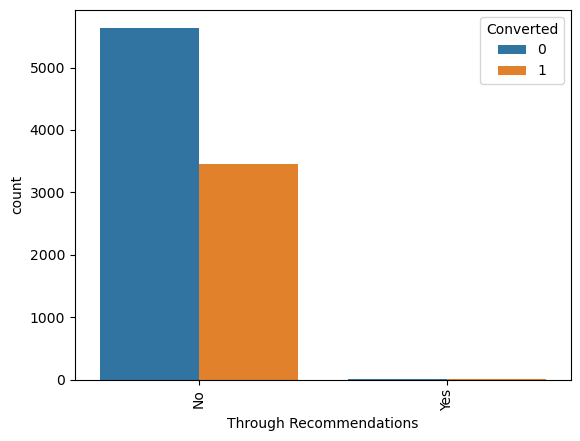

Through Recommendations
object


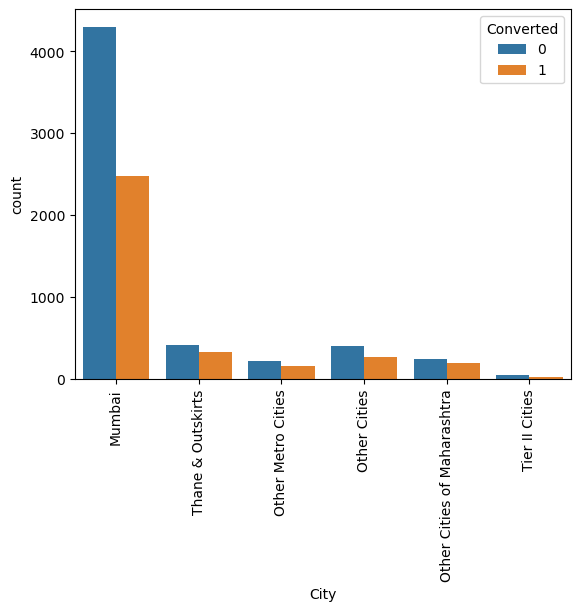

City
object


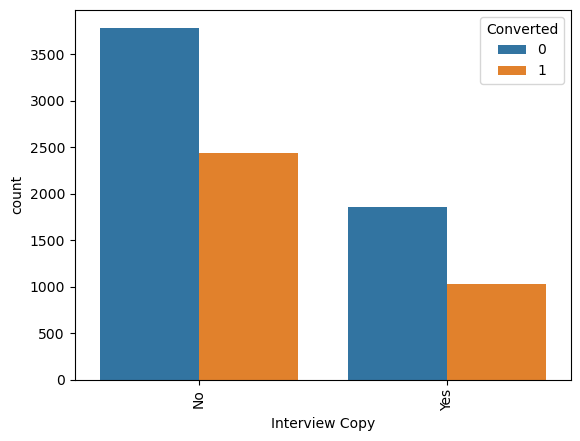

Interview Copy
object


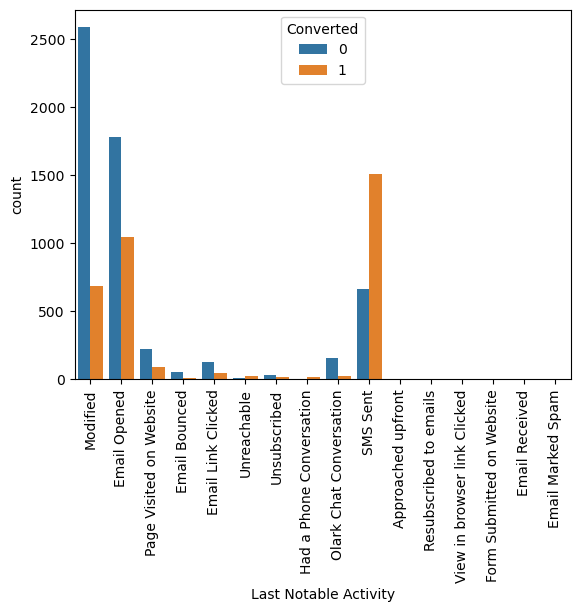

Last Notable Activity
object


In [47]:
# Define a function to loop through the columns and plot based on the datatype of the column
def plot_univariate(df):
    for i in df.columns:
        if str(df[i].dtype)== 'object':
            sns.countplot(i, hue='Converted', data=df)
            plt.xticks(rotation=90)
            plt.show()
            print(i)
            #print(df.groupby(i)['Converted'].value_counts(normalize=True)) # to check for valuecounts if needed
            print(str(df[i].dtype))
                
plot_univariate(leads)

In [48]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'No Email', 'No Call', 'Converted',
       'TotalVisits', 'Surfing Time', 'Page Views', 'Last Activity',
       'Specialization', 'Occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'City', 'Interview Copy',
       'Last Notable Activity'],
      dtype='object')

In [49]:
# From the above analysis we can drpp further more columns since they are not contribution much for the conversion rate
drop_columns= ['No Call','Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations']

leads.drop(drop_columns, axis=1, inplace=True)

- Let's proceed with Data Preparation

## Step 4: Data Preparation

In [50]:
# let's take a look at the data frame again
leads.head(3)

,Lead Origin,Lead Source,No Email,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Specialization,Occupation,City,Interview Copy,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened


In [51]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'No Email', 'Converted', 'TotalVisits',
       'Surfing Time', 'Page Views', 'Last Activity', 'Specialization',
       'Occupation', 'City', 'Interview Copy', 'Last Notable Activity'],
      dtype='object')

### Converting binary variables (Yes/No) to 0/1

In [52]:
# List of variables to map

varlist =  ['No Email', 'Interview Copy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head(3)

,Lead Origin,Lead Source,No Email,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Specialization,Occupation,City,Interview Copy,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened


### Create dummy features for categorical variables with multiple levels (one-hot encoded)

In [53]:
dummies_feature_list= [x for x in leads.columns if str(leads[x].dtype)=='object']
dummies_feature_list

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Occupation',
 'City',
 'Last Notable Activity']

In [54]:
#let's get the dummies for multi-level featuers
dummies= pd.get_dummies(leads[dummies_feature_list], drop_first=True)

leads= pd.concat([leads, dummies], axis=1)
leads.head(3)

,Lead Origin,Lead Source,No Email,Converted,TotalVisits,Surfing Time,Page Views,Last Activity,Specialization,Occupation,City,Interview Copy,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Shape of leads dataframe after creating dummies
leads.shape

(9103, 94)

In [56]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(dummies_feature_list, 1)

In [57]:
leads.shape

(9103, 87)

In [58]:
leads.head(3)

,No Email,Converted,TotalVisits,Surfing Time,Page Views,Interview Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
leads.shape

(9103, 87)

## Step 5: Test-Train Split

### Extract dataframe X with independent variables

In [60]:
# Putting feature variable to X
X= leads.drop(['Converted'], axis=1)
X.head(3)

,No Email,TotalVisits,Surfing Time,Page Views,Interview Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Extract dataframe X with target/dependent variable

In [61]:
y= leads.Converted
y.head(3)

0    0
1    0
2    1
Name: Converted, dtype: int64

- Checking the Conversion Rate

In [62]:
### Checking the Conversion Rate
Conversion_Rate = (sum(leads.Converted)/len(leads.Converted.index))*100
Conversion_Rate

38.02043282434362

We have almost 38% Conversion Rate

In [63]:
# Let's split the data into train and test datasets
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=100)

## Step 6: Feature Scaling

In [64]:
# check for numeric variables to be scaled
X.head(3)

,No Email,TotalVisits,Surfing Time,Page Views,Interview Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [65]:
scale_columns= ['TotalVisits', 'Surfing Time', 'Page Views']

### Scaling with StandardScaler

In [66]:
# Apply StandardScaler on columns to be scaled
scaler= StandardScaler()

X_train[scale_columns]= scaler.fit_transform(X_train[scale_columns])
X_train.head(3)

,No Email,TotalVisits,Surfing Time,Page Views,Interview Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,-0.068258,1.476324,-0.423364,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,0,1.362470,-0.771066,2.083179,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0,0.647106,-0.571257,0.133646,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 7: Model Building

### Feature Selection using RFE

In [67]:
logReg= LogisticRegression()
rfe= RFE(logReg, n_features_to_select=20, step=1)
rfe= rfe.fit(X_train, y_train)

In [68]:
col= X_train.columns[rfe.support_]
col

Index(['No Email', 'Surfing Time', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Services Excellence', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [69]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views', 'Interview Copy',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicke

### Correlation HeatMap

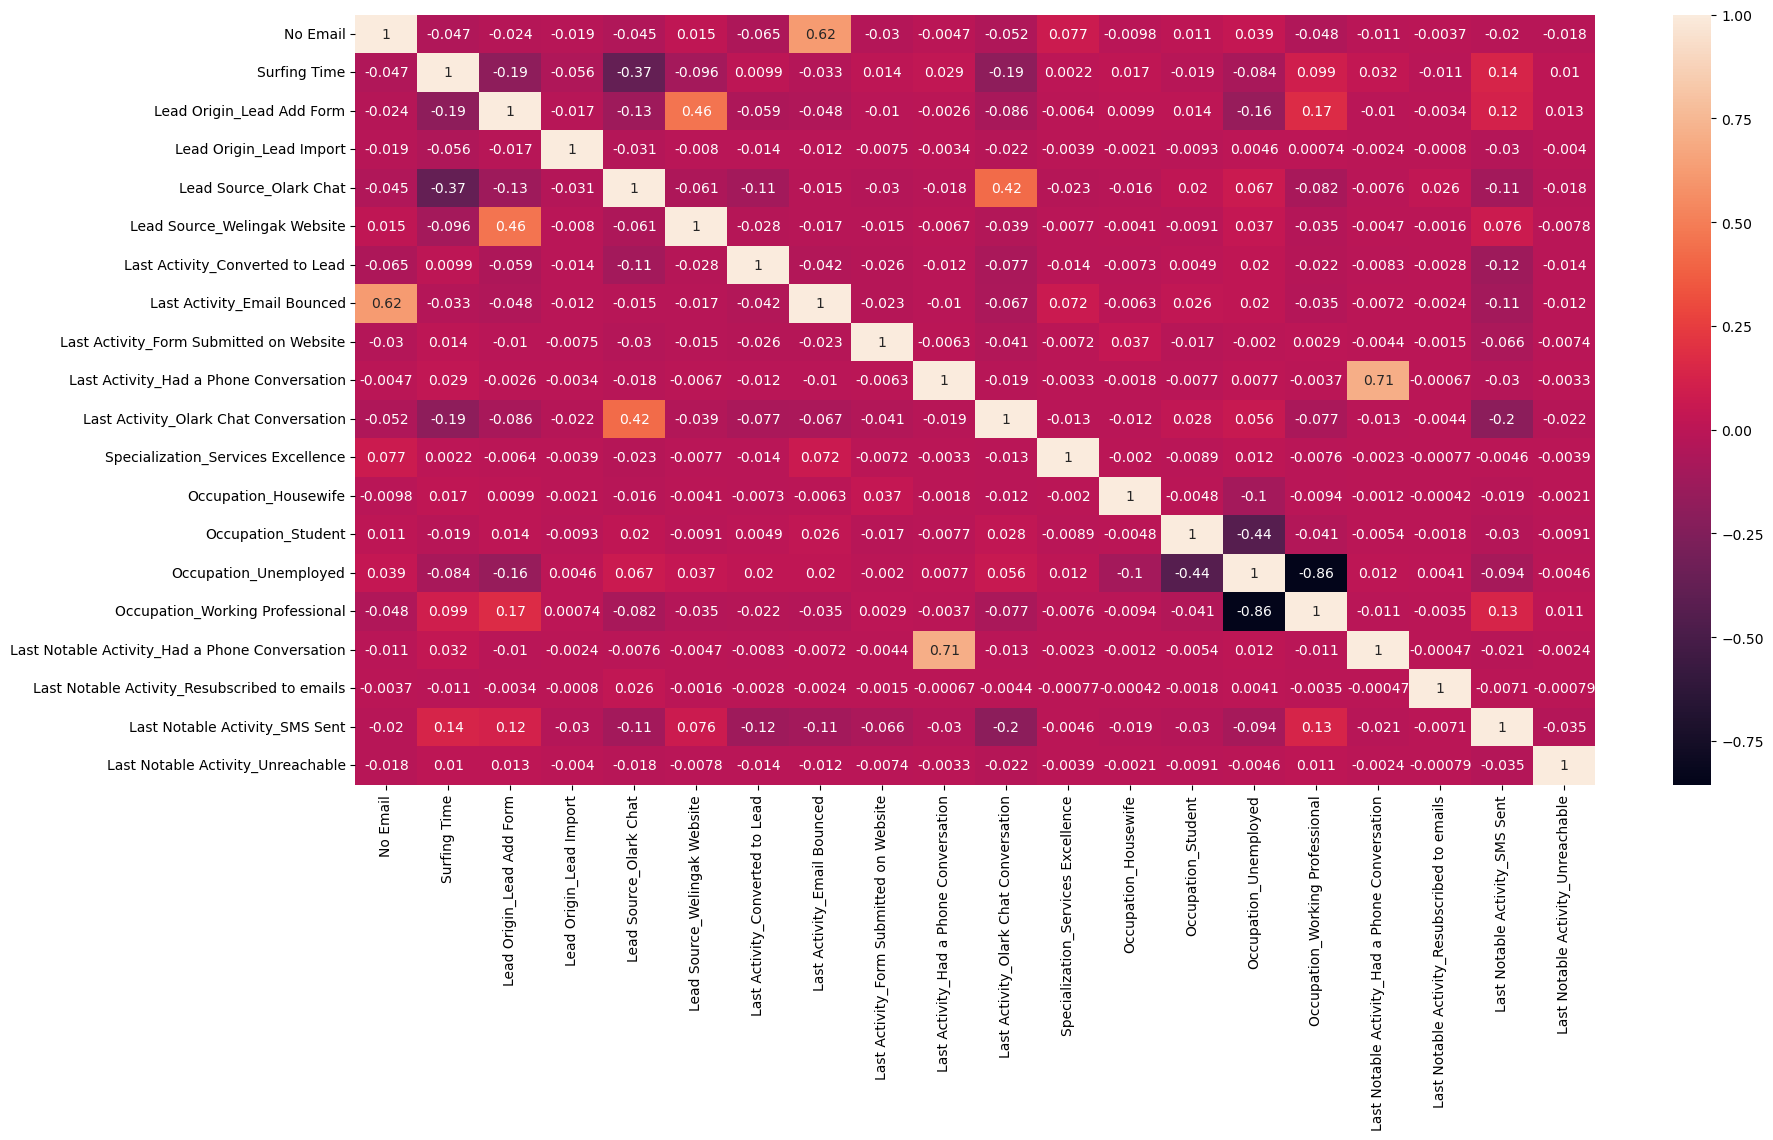

In [70]:
# Let's see the correlation matrix HeatMap
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

### Building First Model

- Assessing the model with StatsModels

In [71]:
X_train_sm= sm.add_constant(X_train[col])
logm1= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.4
Date:                Tue, 19 Sep 2023   Deviance:                       5314.9
Time:                        14:02:17   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.4979      0.551     -0.903      0.366      -1.578       0.582
No Email                                          -1.3087      0.190     -6.882      0.000      -1.681      -0.936
Surfing Time                                       1.1179      0.040     28.020      0.000       1.040       1.196
Lead Origin_Lead Add Form                          3.9646      0.224     17.731      0.000       3.526       4.403
Lead Origin_Lead Import                            1.4326      0.446      3.213      0.001       0.559       2.306
Lead Source_Olark Chat                             1.1213      0.103     10.849      0.000       0.919       1.324
Lead Source_Welingak Website                       1.9750      0.757      2.608      0.009       0.491       3.459
Last Activity_Converted to Lead                   -1.3289      0.210     -6.328      0.000      -1.740      -0.917
Last Activity_Email Bounced                       -0.8588      0.359     -2.390      0.017      -1.563      -0.155
Last Activity_Form Submitted on Website           -0.7081      0.319     -2.216      0.027      -1.334      -0.082
Last Activity_Had a Phone Conversation             0.8633      0.851      1.014      0.310      -0.805       2.532
Last Activity_Olark Chat Conversation             -1.4626      0.160     -9.136      0.000      -1.776      -1.149
Specialization_Services Excellence                 0.9129      0.557      1.638      0.101      -0.179       2.005
Occupation_Housewife                              22.4768   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
Occupation_Student                                -0.4138      0.599     -0.691      0.489      -1.587       0.760
Occupation_Unemployed                             -0.8641      0.552     -1.566      0.117      -1.946       0.218
Occupation_Working Professional                    1.9819      0.581      3.413      0.001       0.844       3.120
Last Notable Activity_Had a Phone Conversation     2.0908      1.409      1.484      0.138      -0.671       4.853
Last Notable Activity_Resubscribed to emails      23.7917   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                     1.4877      0.080     18.546      0.000       1.330       1.645
Last Notable Activity_Unreachable                  1.7516      0.510      3.438      0.001       0.753       2.750
==================================================================================================================
"""

- Drop the columns with high significance value

In [72]:
# from the model summary we can drop the columns with high significance value i.e p-value
col= col.drop(['Occupation_Housewife', 'Last Notable Activity_Resubscribed to emails'])
col

Index(['No Email', 'Surfing Time', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Services Excellence', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### First Model - VIF

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif= pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
13,Occupation_Unemployed,2.10
9,Last Activity_Had a Phone Conversation,2.01
15,Last Notable Activity_Had a Phone Conversation,2.00
0,No Email,1.80
4,Lead Source_Olark Chat,1.79
7,Last Activity_Email Bounced,1.74
2,Lead Origin_Lead Add Form,1.57
16,Last Notable Activity_SMS Sent,1.49
10,Last Activity_Olark Chat Conversation,1.43
5,Lead Source_Welingak Website,1.32


### Building Second Model

In [74]:
X_train_sm= sm.add_constant(X_train[col])
logm2= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Tue, 19 Sep 2023   Deviance:                       5324.9
Time:                        14:02:18   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1251      0.479      0.261      0.794      -0.814       1.064
No Email                                          -1.3132      0.190     -6.897      0.000      -1.686      -0.940
Surfing Time                                       1.1167      0.040     28.011      0.000       1.039       1.195
Lead Origin_Lead Add Form                          3.9627      0.224     17.728      0.000       3.525       4.401
Lead Origin_Lead Import                            1.4303      0.446      3.209      0.001       0.557       2.304
Lead Source_Olark Chat                             1.1240      0.103     10.886      0.000       0.922       1.326
Lead Source_Welingak Website                       1.9761      0.757      2.610      0.009       0.492       3.460
Last Activity_Converted to Lead                   -1.3291      0.210     -6.331      0.000      -1.741      -0.918
Last Activity_Email Bounced                       -0.8556      0.359     -2.381      0.017      -1.560      -0.151
Last Activity_Form Submitted on Website           -0.6747      0.314     -2.149      0.032      -1.290      -0.059
Last Activity_Had a Phone Conversation             0.8627      0.851      1.014      0.311      -0.805       2.531
Last Activity_Olark Chat Conversation             -1.4710      0.160     -9.185      0.000      -1.785      -1.157
Specialization_Services Excellence                 0.9133      0.557      1.639      0.101      -0.179       2.005
Occupation_Student                                -1.0362      0.533     -1.944      0.052      -2.081       0.009
Occupation_Unemployed                             -1.4858      0.480     -3.095      0.002      -2.427      -0.545
Occupation_Working Professional                    1.3586      0.513      2.651      0.008       0.354       2.363
Last Notable Activity_Had a Phone Conversation     2.0902      1.409      1.484      0.138      -0.671       4.852
Last Notable Activity_SMS Sent                     1.4864      0.080     18.537      0.000       1.329       1.644
Last Notable Activity_Unreachable                  1.7498      0.509      3.435      0.001       0.751       2.748
==================================================================================================================
"""

#### Second Model - VIF

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif= pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
13,Occupation_Unemployed,2.10
9,Last Activity_Had a Phone Conversation,2.01
15,Last Notable Activity_Had a Phone Conversation,2.00
0,No Email,1.80
4,Lead Source_Olark Chat,1.79
7,Last Activity_Email Bounced,1.74
2,Lead Origin_Lead Add Form,1.57
16,Last Notable Activity_SMS Sent,1.49
10,Last Activity_Olark Chat Conversation,1.43
5,Lead Source_Welingak Website,1.32


In [76]:
# from the model summary we can drop the columns with high significance value i.e p-value
col= col.drop(['Last Notable Activity_Had a Phone Conversation'])
col

Index(['No Email', 'Surfing Time', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Services Excellence', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Building Third Model

In [77]:
X_train_sm= sm.add_constant(X_train[col])
logm3= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.7
Date:                Tue, 19 Sep 2023   Deviance:                       5327.4
Time:                        14:02:18   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1253      0.479      0.262      0.794      -0.813       1.064
No Email                                   -1.3163      0.190     -6.919      0.000      -1.689      -0.943
Surfing Time                                1.1167      0.040     28.017      0.000       1.039       1.195
Lead Origin_Lead Add Form                   3.9607      0.224     17.716      0.000       3.523       4.399
Lead Origin_Lead Import                     1.4302      0.446      3.208      0.001       0.557       2.304
Lead Source_Olark Chat                      1.1239      0.103     10.887      0.000       0.922       1.326
Lead Source_Welingak Website                1.9785      0.757      2.613      0.009       0.494       3.463
Last Activity_Converted to Lead            -1.3291      0.210     -6.331      0.000      -1.741      -0.918
Last Activity_Email Bounced                -0.8528      0.359     -2.374      0.018      -1.557      -0.149
Last Activity_Form Submitted on Website    -0.6747      0.314     -2.149      0.032      -1.290      -0.059
Last Activity_Had a Phone Conversation      1.7865      0.616      2.901      0.004       0.579       2.994
Last Activity_Olark Chat Conversation      -1.4711      0.160     -9.186      0.000      -1.785      -1.157
Specialization_Services Excellence          0.9138      0.557      1.640      0.101      -0.178       2.006
Occupation_Student                         -1.0362      0.533     -1.944      0.052      -2.081       0.009
Occupation_Unemployed                      -1.4858      0.480     -3.095      0.002      -2.427      -0.545
Occupation_Working Professional             1.3576      0.513      2.649      0.008       0.353       2.362
Last Notable Activity_SMS Sent              1.4865      0.080     18.538      0.000       1.329       1.644
Last Notable Activity_Unreachable           1.7497      0.509      3.435      0.001       0.751       2.748
===========================================================================================================
"""

#### Third Model - VIF

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif= pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
13,Occupation_Unemployed,2.10
0,No Email,1.80
4,Lead Source_Olark Chat,1.79
7,Last Activity_Email Bounced,1.74
2,Lead Origin_Lead Add Form,1.57
15,Last Notable Activity_SMS Sent,1.49
10,Last Activity_Olark Chat Conversation,1.43
5,Lead Source_Welingak Website,1.32
1,Surfing Time,1.30
14,Occupation_Working Professional,1.22


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Predict values on the Train dataset

In [79]:
# Getting the predicted values on the train set
y_train_pred= res.predict(X_train_sm)
y_train_pred[:5]

7962    0.855022
5520    0.097838
1962    0.119375
1566    0.954320
9170    0.227867
dtype: float64

In [80]:
y_train_pred.shape

(6372,)

In [81]:
# Let's reshape the y_train_pred
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.85502227, 0.09783778, 0.11937465, 0.95432035, 0.22786699])

### Dataframe with Target values and predicted probabilities for Train Data

In [82]:
y_train_pred_final= pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(3)

,Converted,Converted_Prob,CustID
0,0,0.855022,7962
1,0,0.097838,5520
2,0,0.119375,1962


- Add new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [83]:
y_train_pred_final['predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
# Let's see the head
y_train_pred_final.head(3)

,Converted,Converted_Prob,CustID,predicted
0,0,0.855022,7962,1
1,0,0.097838,5520,0
2,0,0.119375,1962,0


In [84]:
# Let's look at the Confusion Matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3505  448]
 [ 738 1681]]


In [85]:
# Predicted       not_converted      converted
# Actual
# not_converted        3505            448
# converted            738             1681  

In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8138731952291274


## Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [87]:
# Let's look at the auc score (Area Under the Curve)
auc_score = metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
print('AOC:', auc_score)

AOC: 0.8805269481517378


In [88]:
# function to plot roc
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### ROC Curve Plot

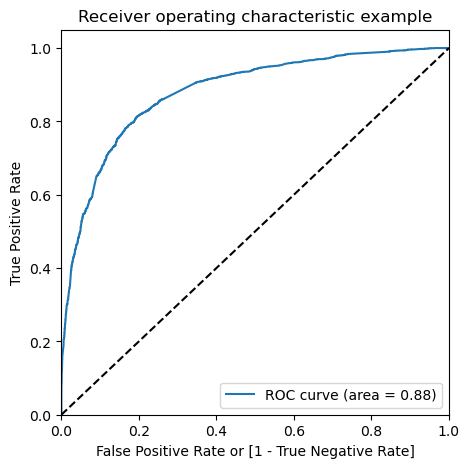

In [89]:
# Let's visualize the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.855022,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.097838,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.119375,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.954320,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.227867,9170,0,1,1,1,0,0,0,0,0,0,0


### Model Metrics on Train Data

In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.584118  0.967342  0.349608
0.2   0.2  0.736347  0.912774  0.628384
0.3   0.3  0.796139  0.834229  0.772831
0.4   0.4  0.814815  0.769740  0.842398
0.5   0.5  0.813873  0.694915  0.886668
0.6   0.6  0.796767  0.582059  0.928156
0.7   0.7  0.780760  0.503100  0.950670
0.8   0.8  0.761770  0.420008  0.970908
0.9   0.9  0.713277  0.262505  0.989122


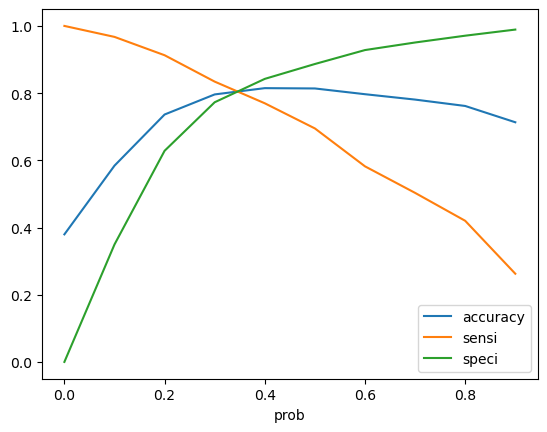

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above 0.3 is the optimum point to take it as a cutoff probability.

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.855022,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.097838,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.119375,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.954320,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.227867,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7961393596986818

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3055,  898],
       [ 401, 2018]])

#### Metrics beyond simply accuracy

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8342290202563043

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.7728307614470022

In [99]:
# Calculate false postive rate - predicting Converted when learner does not have converted
print(FP/ float(TN+FP))

0.22716923855299773


In [100]:
# positive predictive value 
print (TP / float(TP+FP))

0.6920438957475995


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8839699074074074


#### Precision and Recall

In [102]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3505,  448],
       [ 738, 1681]])

##### Precision
TP / TP + FP

In [103]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7895725692813528

##### Recall
TP / TP + FN

In [104]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6949152542372882

### Precision and recall tradeoff

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

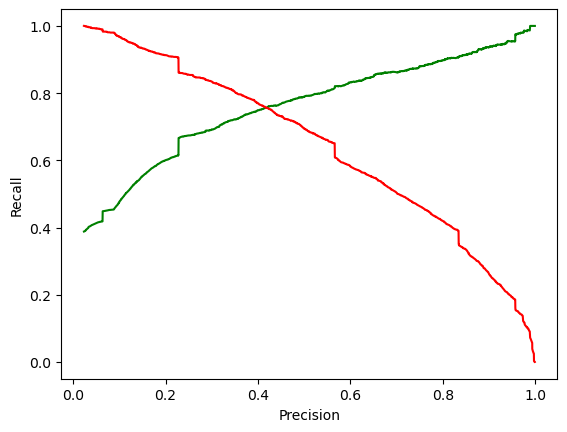

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

## Step 9: Making predictions on the Test Dataset

Features that contribute to the Prediction

In [107]:
#let's look at the col list for the features
col

Index(['No Email', 'Surfing Time', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Services Excellence', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [108]:
scale_columns

['TotalVisits', 'Surfing Time', 'Page Views']

In [109]:
# we have to apply StandardScaler on columns to be scaled
X_test[scale_columns]= scaler.transform(X_test[scale_columns])
X_test.head()

,No Email,TotalVisits,Surfing Time,Page Views,Interview Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,0,-0.068258,-0.103815,0.412150,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4050,0,-1.141305,-0.881052,-1.258878,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7201,1,-0.425940,0.424120,-0.144859,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1196,0,0.289424,-0.105648,0.969160,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8219,0,1.362470,-0.428274,-0.284112,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [110]:
X_test= X_test[col]
X_test.head(3)

,No Email,Surfing Time,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Services Excellence,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,0,-0.103815,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0,-0.881052,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7201,1,0.424120,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [111]:
X_test_sm= sm.add_constant(X_test)

In [112]:
#Making predictions on the test set
y_test_pred= res.predict(X_test_sm)
y_test_pred[:5]

3504    0.185973
4050    0.957011
7201    0.328108
1196    0.185663
8219    0.137205
dtype: float64

In [113]:
y_test_pred= y_test_pred.values.reshape(-1)
y_test_pred

array([0.18597307, 0.9570113 , 0.3281083 , ..., 0.10588654, 0.92452217,
       0.9082296 ])

### DataFrame with Converted values and predicted probabilities for Test Data

In [114]:
y_test_pred_final= pd.DataFrame({'CustID': y_test.index,
                                 'Converted': y_test.values, 
                                 'Converted_Prob': y_test_pred, 
                                 'Lead Score': y_test_pred*100})
y_test_pred_final.head(3)

,CustID,Converted,Converted_Prob,Lead Score
0,3504,0,0.185973,18.597307
1,4050,1,0.957011,95.701130
2,7201,0,0.328108,32.810830


In [115]:
### Calculate Lead Score from Converted_Prob
y_test_pred_final['Lead Score'] = y_test_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head(3)

,CustID,Converted,Converted_Prob,Lead Score,final_predicted
0,3504,0,0.185973,18.60,0
1,4050,1,0.957011,95.70,1
2,7201,0,0.328108,32.81,1


### Model Metrics on Test Data

#### Model Accuracy

In [116]:
# Let's check the overall accuracy.
model_accuracy= metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
print("Model Accuracy:", model_accuracy)
print("Model Accuracy (%) :", round(model_accuracy *100, 2))

Model Accuracy: 0.8004393994873673
Model Accuracy (%) : 80.04


#### Model Confusion Matrix

In [117]:
confusion_test_matrix = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
print("Model Confusion Matrix")
print(confusion_test_matrix)

Model Confusion Matrix
[[1303  386]
 [ 159  883]]


In [118]:
TP = confusion_test_matrix[1,1] # true positive 
TN = confusion_test_matrix[0,0] # true negatives
FP = confusion_test_matrix[0,1] # false positives
FN = confusion_test_matrix[1,0] # false negatives

In [119]:
print("TP:", TP, "-", "TN:", TN, "-", "FP:", FP, "-", "FN:", FN )

TP: 883 - TN: 1303 - FP: 386 - FN: 159


#### Model Sensitivity

In [120]:
# Let's see the sensitivity of our logistic regression model
model_sensitivity= TP / float(TP+FN)
print("Model Sensitivity:", model_sensitivity)
print("Model Sensitivity (%) :", round(model_sensitivity *100, 2))

Model Sensitivity: 0.8474088291746641
Model Sensitivity (%) : 84.74


#### Model Specificity

In [121]:
# Let us calculate specificity
model_specificity= TN / float(TN+FP)
print("Model Specificity:", model_specificity)
print("Model Specificity (%) :", round(model_specificity *100, 2))

Model Specificity: 0.7714624037892244
Model Specificity (%) : 77.15


#### Model Precision

In [122]:
model_precision= precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
print("Model Precision:", model_precision)
print("Model Precision (%) :", round(model_precision *100, 2))

Model Precision: 0.6958234830575256
Model Precision (%) : 69.58


#### Model Recall

In [123]:
model_recall= recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
print("Model Recall:", model_recall)
print("Model Recall (%) :", round(model_recall *100, 2))

Model Recall: 0.8474088291746641
Model Recall (%) : 84.74


#### Model F-Score

In [124]:
F1_Score= 2* model_precision * model_recall/(model_precision+model_recall)
print("F1_Score :", round(F1_Score, 2))

F1_Score : 0.76


<b> The Final Logistic Regression Model has the  Model Accuracy (%) : 80.04 and  Model Sensitivity (%) : 84.74<b>